In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

dataset = pd.read_csv('datasets/historical_data.csv')

dataset.info()

dataset['created_at'] = pd.to_datetime(dataset['created_at'], format='%Y-%m-%d %H:%M:%S')

dataset['actual_delivery_time'] = pd.to_datetime(dataset['actual_delivery_time'], format='%Y-%m-%d %H:%M:%S')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [2]:
dataset

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


# Pregunta 1

      store_id  subtotal
0         6074   2636241
1         2056   1973935
2         3937   1971088
3         4428   1880387
4         3748   1821966
...        ...       ...
6738      5417       388
6739      1062       339
6740       657       300
6741      3796       230
6742       214       215

[6743 rows x 2 columns]


<Axes: xlabel='store_id', ylabel='subtotal'>

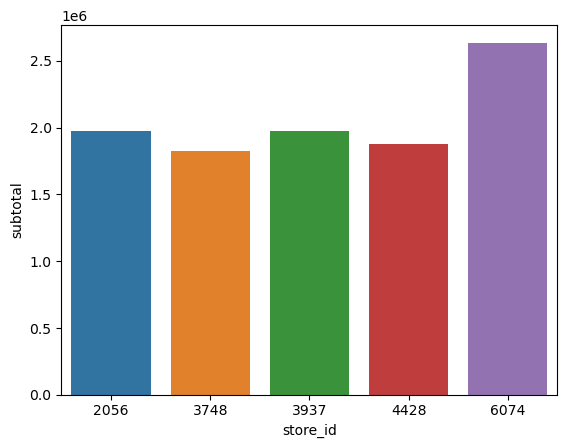

In [3]:
filtered_dataset = dataset[['store_id', 'subtotal']]

filtered_dataset = filtered_dataset.groupby(['store_id'])

filtered_dataset = filtered_dataset['subtotal'].sum()

filtered_dataset = filtered_dataset.sort_values(ascending=False)

filtered_dataset = filtered_dataset.reset_index()

print(filtered_dataset)

plt.xlabel('Store id')

plt.ylabel('Subtotal')

sb.barplot(filtered_dataset[0:5], x='store_id', y='subtotal')


La tienda con más cantidad de dinero en ventas es la tienda con ID:

In [4]:
filtered_dataset.loc[0, 'store_id']

6074

# Pregunta 2

In [5]:
filtered_dataset = dataset[['store_id', 'store_primary_category']].loc[dataset['store_primary_category'] == 'pizza']

filtered_dataset = filtered_dataset.groupby(['store_id'])

El número de distintos stores que venden pizzas es:

In [6]:
print(filtered_dataset.ngroups)

1088


# Pregunta 3

Para saber si existe relación entre estas dos columnas, se establecerá una matriz de correlación, pues esta nos permite saber no solo la dirección de la relación sino también la fuerza de esta.

In [7]:
filtered_dataset = dataset[['num_distinct_items', 'estimated_store_to_consumer_driving_duration']]

filtered_dataset.corr()

,num_distinct_items,estimated_store_to_consumer_driving_duration
num_distinct_items,1.000000,0.022693
estimated_store_to_consumer_driving_duration,0.022693,1.000000


Con esto se concluye que las dos variables, considerando que el valor de la correlación es muy cercano a 0 (prácticamente 0), basicamente no están correlacionadas. Aún así, se sabe que debido a que el resultado es número positivo bastante bajo, pudiese decirse que existe una correlación bastante débil entre estas dos.  

# Pregunta 4

Se realizará un ordenamiento por el valor total promedio de los tiempos de duración por categoría de comida. Con esto se mostrarán en una gráfica los 5 primeros valores, ya que al estar ordenado de forma ascendente por tiempo de preparación, el primero siempre será el menor.

/tmp/ipykernel_77816/2095814938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['preparation_time'] = (filtered_dataset['actual_delivery_time'] - filtered_dataset['created_at']).dt.total_seconds()


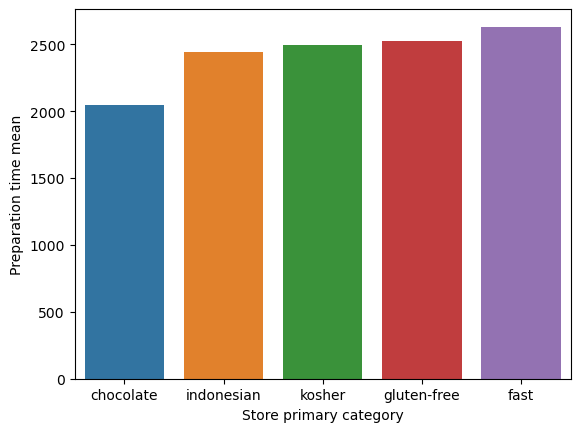

In [8]:
filtered_dataset = dataset[['created_at', 'actual_delivery_time', 'store_primary_category']]

filtered_dataset['preparation_time'] = (filtered_dataset['actual_delivery_time'] - filtered_dataset['created_at']).dt.total_seconds()

filtered_dataset = filtered_dataset.groupby('store_primary_category')

filtered_dataset = filtered_dataset['preparation_time'].mean()

filtered_dataset = filtered_dataset.sort_values(ascending=True)

filtered_dataset = filtered_dataset.reset_index()

sb.barplot(filtered_dataset[0:5], x='store_primary_category', y='preparation_time')

plt.xlabel('Store primary category')

plt.ylabel('Preparation time mean')

plt.show()

Así, se tiene que usando el tiempo de preparación en promedio de cada tipo de comida, la categoría "chocolate" es la que tiene menos tiempo de preparación.

In [9]:
filtered_dataset.loc[0]

store_primary_category    chocolate
preparation_time             2048.0
Name: 0, dtype: object

# Pregunta 5

Para obtener la ubicación con menos ordenes se aplicará una búsqueda clásica con una agrupación por "market id".

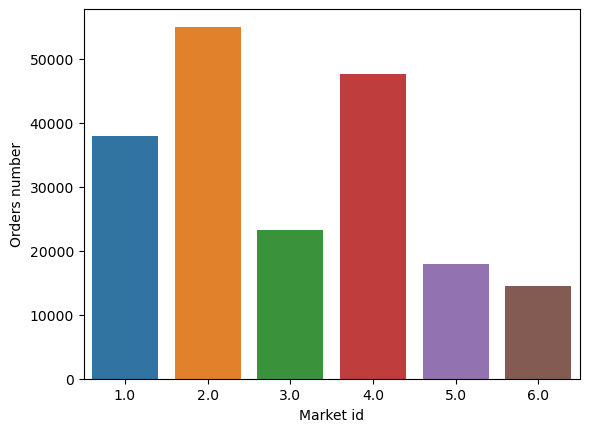

market_id            6.0
orders_number    14450.0
Name: 5, dtype: float64


In [10]:
filtered_dataset = dataset[['market_id', 'created_at', 'actual_delivery_time', 'total_outstanding_orders']].groupby('market_id')

filtered_dataset = filtered_dataset.size().reset_index()

filtered_dataset.columns = ['market_id', 'orders_number']

sb.barplot(filtered_dataset, x='market_id', y='orders_number')

plt.xlabel('Market id')

plt.ylabel('Orders number')

plt.show()

print(filtered_dataset.loc[5])

Como se puede ver, la ubicación 6 es la que tiene menos ordenes, así, esta es la que se procederá a usar. 

Ahora, se buscará cual es la mejor hora para ordenar entre las 5:00pm y las 10:00pm en la ubcación 6. Se tomarán dos variables en consideración para tomar medidas, la primera será con el número de ordenes por hora y la segunda seŕa por tiempo de preparación por hora.

   created_at_hour  orders_number
0               17            216
1               18            382
2               19            911
3               20            980
4               21            800
5               22            637


/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


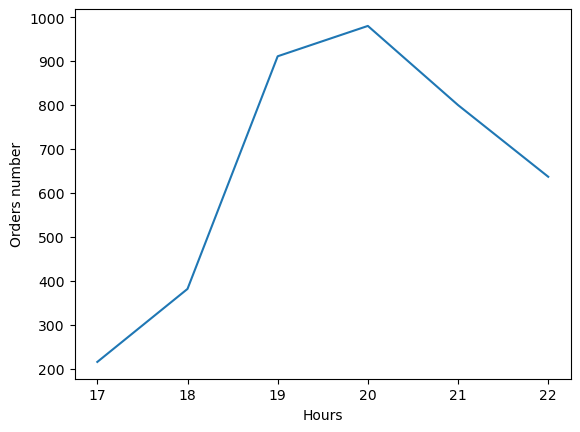

        market_id          created_at actual_delivery_time  preparation_time
160           6.0 2015-02-06 01:11:56  2015-02-06 01:42:51            1855.0
161           6.0 2015-02-14 02:07:47  2015-02-14 03:17:37            4190.0
162           6.0 2015-01-31 21:58:30  2015-01-31 22:55:32            3422.0
163           6.0 2015-02-08 03:28:59  2015-02-08 05:32:11            7392.0
164           6.0 2015-01-23 19:29:17  2015-01-23 20:25:25            3368.0
...           ...                 ...                  ...               ...
196700        6.0 2015-02-09 02:56:41  2015-02-09 03:49:03            3142.0
196701        6.0 2015-02-17 03:24:51  2015-02-17 04:37:10            4339.0
196893        6.0 2015-02-03 05:31:31  2015-02-03 06:01:08            1777.0
197067        6.0 2015-01-23 20:37:37  2015-01-23 21:15:08            2251.0
197150        6.0 2015-01-28 02:30:50  2015-01-28 03:40:07            4157.0

[14450 rows x 4 columns]
   created_at_hour  preparation_time_mean
0       

/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


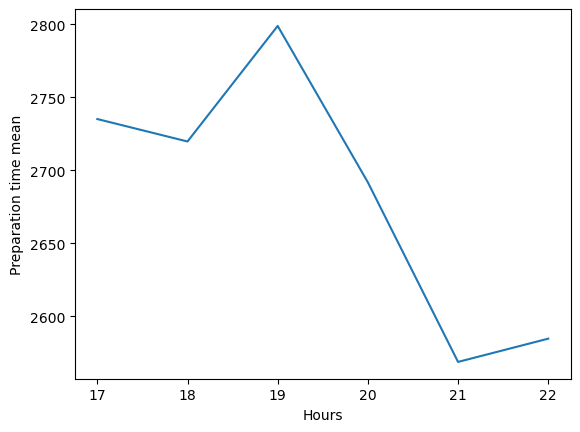

In [11]:
# First alternative with orders number 

filtered_dataset = dataset[['market_id', 'created_at']].loc[dataset['market_id'] == 6]

filtered_dataset = filtered_dataset.groupby(filtered_dataset['created_at'].dt.hour).size().loc[17:22].reset_index()

filtered_dataset.columns = ['created_at_hour', 'orders_number'] 

best_hour_based_orders_number = filtered_dataset.loc[0]

print(filtered_dataset)

sb.lineplot(filtered_dataset, x="created_at_hour", y="orders_number")

plt.xlabel('Hours')

plt.ylabel('Orders number')

plt.show()

# Second alternative with preparation time 

filtered_dataset = dataset[['market_id', 'created_at', 'actual_delivery_time']].loc[dataset['market_id'] == 6]

filtered_dataset['preparation_time'] = (filtered_dataset['actual_delivery_time'] - filtered_dataset['created_at']).dt.total_seconds()

print(filtered_dataset)

filtered_dataset = filtered_dataset.groupby(filtered_dataset['created_at'].dt.hour)['preparation_time'].mean().loc[17:22].reset_index()

filtered_dataset.columns = ['created_at_hour', 'preparation_time_mean'] 

best_hour_based_preparation_time = filtered_dataset.loc[4]

print(filtered_dataset)

sb.lineplot(filtered_dataset, x="created_at_hour", y="preparation_time_mean")

plt.xlabel('Hours')

plt.ylabel('Preparation time mean')

plt.show()


Con esto se concluye que la hora en la mejor hora para ordenar, tomando en cuenta el promedio del número de ordenes pendientes por estas horas, es las 17:00, ya que se tienen alrededor de 9 ordenes en promedio por las horas indicadas, número que, es el mas bajo de entre todos los presentes en el rango propuesto.

In [12]:
best_hour_based_orders_number

created_at_hour     17
orders_number      216
Name: 0, dtype: int64

Por otra parte, para el caso del promedio de tiempo de preparación por hora, se concluye que la hora en la que se tiene un promedio más bajo de tiempo de preparación son las 21:00.

In [13]:
best_hour_based_preparation_time

created_at_hour            21.0000
preparation_time_mean    2568.6975
Name: 4, dtype: float64